In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import numpy as np
data = load_breast_cancer()

model=LogisticRegression(max_iter=4000)

X_train,X_test,y_train,y_test=train_test_split(data.data, data.target,random_state=42,test_size=0.2 )

model.fit(X_train,y_train)

#que nos diga que si tiene o no cancer el valor 10
print(model.predict(X_train)[10])
#ahora veremos como logreg hace las predicciones
if model.coef_@X_train[10]+model.intercept_>0:
    print(model.coef_@X_train[10]+model.intercept_)
    print('como el raw model output es mayor a cero, predice como positivo o 1')
else:
    print('como el raw model output es negativo, predice como 0')


1
[2.88030849]
como el raw model output es mayor a cero, predice como positivo o 1


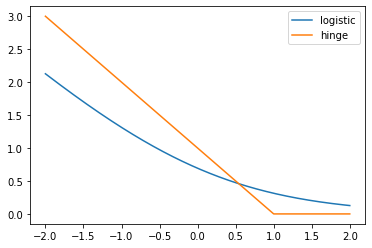

In [31]:
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp  (-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()


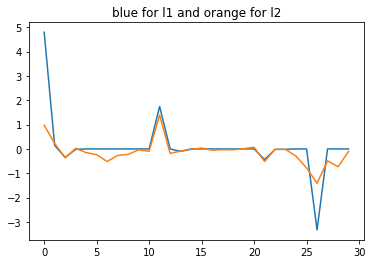

In [27]:
#regularization logreg
lr_l1=LogisticRegression(penalty='l1', max_iter=3300, solver='liblinear') #lasso regularization
lr_l2=LogisticRegression(max_iter=3300) #ridge regularization by default


lr_l1.fit(X_train,y_train)
lr_l2.fit(X_train,y_train)
plt.title('blue for l1 and orange for l2')
print(plt.plot(lr_l1.coef_.flatten()))
print(plt.plot(lr_l2.coef_.flatten()))

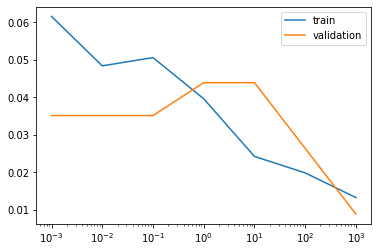

As you can see, too much regularization (small C) doesnt work well - due to underfitting - and too little regularization (large C) doesnt work well either - due to overfitting.


In [28]:
#effect of regularization

# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# Loop over values of C_value
for C_value in C_values:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value, max_iter=10000)
    lr.fit(X_train,y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train,y_train))
    valid_errs.append( 1.0 - lr.score(X_test,y_test)) 
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

print('As you can see, too much regularization (small C) doesnt work well - due to underfitting - and too little regularization (large C) doesnt work well either - due to overfitting.')

In [32]:
lr = LogisticRegression(max_iter=10000)

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 10}
Total number of features: 30
Number of selected features: 30
